In [1]:
# NO CODE

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Exponential Distribution ##

Let $\lambda$ be a positive constant. A random variable $T$ has the *exponential distribution with rate $\lambda$* if the density of $T$ is given by

$$
f(t) ~ = \lambda e^{-\lambda t}, ~~~ t \ge 0
$$

The graph below shows the density $f$ for $\lambda = 5$.

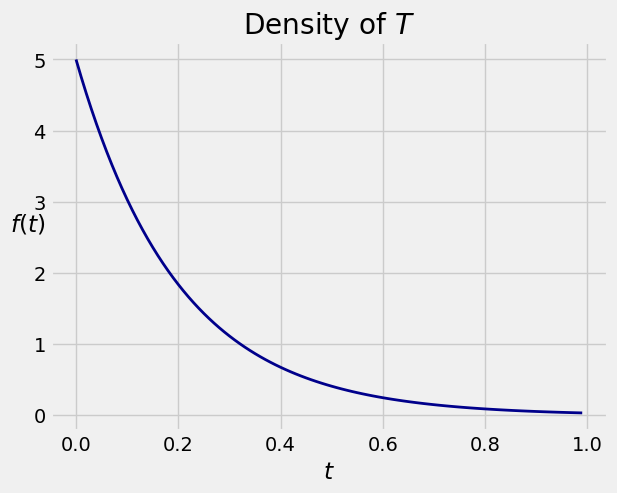

In [2]:
# NO CODE

lam = 5
t = np.arange(0, 1, 0.01)
y = stats.expon.pdf(t, scale=1/5)

plt.plot(t, y, color='darkblue', lw=2)
plt.xlabel('$t$')
plt.ylabel('$f(t)$', rotation=False)
plt.title('Density of $T$');

### CDF and Survival Function ###
The exponential distribution is often used as a model for random lifetimes that have an interesting property that we will describe below. For now, just think of $T$ as the lifetime of an object like a lightbulb, and note that the cdf at time $t$ can be thought of as the chance that the object dies before time $t$:

$$
\begin{align*}
F(t) ~ &= ~ P(T \le t) \\
&= ~ \int_0^t \lambda e^{-\lambda s}ds \\
&= ~ \left. -e^{-\lambda s} \right\rvert_0^t \\
&= ~ 1 - e^{-\lambda t}
\end{align*}
$$

The complementary event is that the object survives past time $t$, and therefore its probability defines the *survival function* $S$:

$$
S(t) ~ = ~ P(T > t) ~ = ~ 1 - F(t) ~ = ~ e^{-\lambda t}
$$

### Memoryless Property ###
The survival function tells us something unusual about exponentially distributed lifetimes. Let $s$ and $t$ be positive, and let's find the conditional probability that the object survives a further $s$ units of time given that it has already survived $t$.

$$
\begin{align*}
P(T > t+s \mid T > t) ~ &= ~ \frac{P(T > t+s, T > t)}{P(T > t)} \\ 
&= ~ \frac{P(T > t+s)}{P(T > t)} \\
&= ~ \frac{e^{-\lambda(t+s)}}{e^{-\lambda t}} \\
&= ~ e^{-\lambda s} \\
&= ~ P(T > s)
\end{align*}
$$

Notice that $t$ does not appear in the answer. So for example the chance that the object survives an additional year given that it has been alive for 50 years is the same as the chance that is survives a year when it starts out brand new. It *forgets* that it has already lived 50 years. 

This is called the *memoryless property* of the exponential distribution. It can be shown that the exponential and the geometric are the only two distributions that have the memoryless property. As you can see, the graph of the exponential density resembles the geometric probability histogram.

The memoryless property is an excellent reason *not* to use the exponential distribution to model the lifetimes of people or of anything that ages. For lifetimes of things like lightbulbs or radioactive atoms, the exponential distribution often does fine.

### Mean and SD ###
The expectation of $T$ is given by

$$
E(T) ~ = ~ \int_0^{\infty} t\lambda e^{-\lambda t} dt ~ = ~ \frac{1}{\lambda}
$$

either by integration by parts or by recognizing that the indefinite integral of $\lambda te^{-\lambda t}$ is $-te^{-\lambda t} + e^{-\lambda t}$. 

This result is an indication of why $\lambda$ is called the rate of the lifetime distribution. The bigger $\lambda$ is, the faster the item is expected to die.

To find $E(T^2)$, you can use integration by parts again, or you can just accept that $E(T^2) = 2/\lambda^2$ and therefore 

$$
Var(T) ~ = ~ \frac{1}{\lambda^2} ~~~~ \mbox{and } ~~~~ SD(T) = \frac{1}{\lambda}
$$

The SD of the exponential distribution is the same as the mean.

The graph below shows the exponential density $f$ with the labeled points on the horizontal axis corresponding to standard units of -1, 0, 1, 2, and 3. The random variable $T$ can't be negative, and the density doesn't go further than 1 SD below the mean. The spread comes from the long right hand tail.

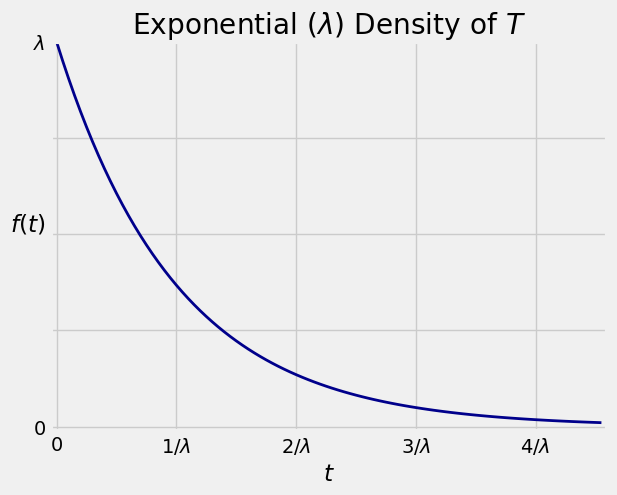

In [3]:
# NO CODE

lam = 5
sd = 1/lam
t = np.arange(0, 4.6*sd, 0.01)
y = stats.expon.pdf(t, scale=sd)

plt.plot(t, y, color='darkblue', lw=2)
plt.xticks(np.arange(0, 4*sd+0.1, sd),
          ['0', r'$1/\lambda$', r'$2/\lambda$', r'$3/\lambda$', r'$4/\lambda$'])
plt.yticks([0, lam/4, lam/2, 3*lam/4, lam], 
           ['0','','','', r'$\lambda$'])
plt.xlim(-0.01, 4.6*sd)
plt.ylim(-0.05, lam)
plt.xlabel('$t$')
plt.ylabel('$f(t)$', rotation=0)
plt.title(r'Exponential $(\lambda)$ Density of $T$');

### Median ###
The figure below displays graphs of the cdf and survival function of $T$.

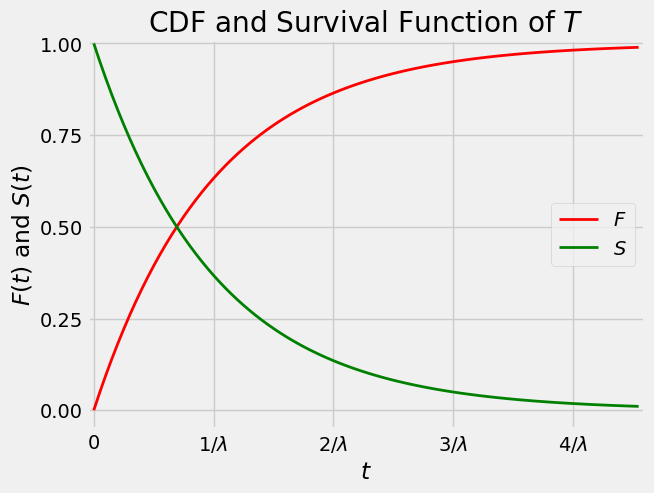

In [4]:
# NO CODE

plt.plot(t, stats.expon.cdf(t, scale=sd), color='r', lw=2, label='$F$')
t = np.arange(0, 4.6*sd, 0.01)
plt.plot(t, 1-stats.expon.cdf(t, scale=sd), color='g', lw=2, label='$S$')
plt.legend()
plt.xticks(np.arange(0, 4*sd+0.1, sd),
          ['0', r'$1/\lambda$', r'$2/\lambda$', r'$3/\lambda$', r'$4/\lambda$'])
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlim(-0.01, 4.6*sd)
plt.ylim(-0.05, 1.01)
plt.xlabel('$t$')
plt.ylabel('$F(t)$ and $S(t)$')
plt.title('CDF and Survival Function of $T$');

The two curves intersect at the vertical level $0.5$. 

This is because if $h$ is the value of $t$ at which the curves intersect, then:

- $S(h) = 1 - F(h)$
- $S(h) = F(h)$


Therefore

$$
S(h) ~ = ~ 0.5 ~ = ~ F(h)
$$

That is,

$$
P(T > h) = 0.5 = P(T < h)
$$

The point $h$ is called the *median* of the distribution of $T$; we are using the notation $h$ for "half". We can find $h$ in terms of $\lambda$ by using the formula for the survival function.

$$
\begin{align*}
e^{-\lambda h} = 0.5 ~ &\iff ~ -\lambda h = \log(0.5)\\
&\iff ~ \lambda h =  \log(2) \\
&\iff ~ h = \frac{\log(2)}{\lambda} = \log(2)E(T)
\end{align*}
$$

Because $\log(2) < 1$, the median lifetime $h$ is less than the mean lifetime $E(T) = 1/\lambda$ as you can see on the graph. This is consistent with an observation you made in Data 8: if a distribution has a right hand tail, the median is less than the mean.

### Half Life ###

The exponential distribution is often used to model lifetimes of objects like radioactive atoms that spontaneously decay at an exponential rate. The *half life* of a radioactive isotope is defined as the time by which half of the atoms of the isotope will have decayed. That is, the half life is the median of the exponential lifetime of the atom. The parameter $\lambda$ is called the *decay rate* of the atom. By the property of the median $h$ derived above, the relation between $\lambda$ and the half life is

$$
h = \frac{\log(2)}{\lambda}
$$

This relation shows that if you know the rate of decay of the isotope, you can find its half-life. By rearranging the relation you can see that if you know the half-life of the isotope then you can find the rate of decay:

$$
\lambda = \frac{\log(2)}{h}
$$

### Radiocarbon Dating ###
We can generalize the calculation above to any proportion. 

$$
p ~ = ~ e^{-\lambda t} ~ \iff ~ t = \frac{-\log(p)}{\lambda}
$$

This is used in [radiocarbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating), which is a method for estimating the age of an object containing animal or plant material. The method is based on the exponential decay of *radiocarbon* ($^{14}C$), an isotope of carbon ($C$). 

Here is a hugely simplified description of radiocarbon dating. Radiocarbon exists in the atmosphere. During their lifetimes, plants and animals are in equilibrium with the atmosphere and have the same proportion of radiocarbon as the atmosphere does. Once the plant or animal dies, it no longer acquires new atoms of radiocarbon. The amount of radiocarbon in it gradually decays, but other isoptopes of carbon, such as $^{14}C$, are *stable* and don't decay. These properties allow scientists to estimate the proportion of $^{14}C$ that remains in the organic matter being studied.

If $p$ is that proportion, the model says

$$
p ~ = ~ e^{-\lambda t}
$$

where $\lambda$ is the decay rate of $^{14}C$ and $t$ is the time that has elapsed since the organic matter was alive.

Therefore the time elapsed is

$$
t = \frac{-\log(p)}{\lambda}
$$

and so we know when the organism was alive. 

It is known that the half life of $^{14}C$ is 5,730 years – radiocarbon hangs around for a *long* time before it decays. By our results about the half life,

$$
\lambda ~ = ~ \frac{\log(2)}{5730}
$$

and therefore

$$
t ~ = ~  \frac{-\log(p)}{\log(2)/5730}
$$

Thus for example if the proportion of $^{14}C$ remaining in the object is $0.3$, then time elapsed is

$$
t ~ = ~ \frac{-\log(0.3)}{\log(2)/5730} ~ \approx ~ 9953 \text{ years }
$$

In [5]:
-np.log(0.3) / (np.log(2) / 5730)

9952.812854572363

We are estimating that the object is about 9,953 years old.

It is important to keep in mind that the method produces an estimate, and therefore a margin of error has to be provided. This depends on details of the model that are beyond the scope of the course. But as an example, note that [Willard Libby](https://en.wikipedia.org/wiki/Willard_Libby), the physical chemist who received the Nobel Prize for developing the method of radiocarbon dating, used the method for estimating the age of the [Dead Sea Scrolls](https://en.wikipedia.org/wiki/Radiocarbon_dating#Dead_Sea_Scrolls). His estimate was 1,917 $\pm$ 200 years.

So the next time you are at a museum and a docent announces that a fossil is 11,000 years and 3 months old, "because when I started working here 3 months ago they told me it was 11,000 years old," do smile politely, and then see if the written documentation includes a standard deviation.